In [11]:
import sys
!{sys.executable} -m pip install seaborn


     -------------------------------------- 294.9/294.9 KB 6.1 MB/s eta 0:00:00
     ---------------------------------------- 8.1/8.1 MB 36.7 MB/s eta 0:00:00
     ---------------------------------------- 71.9/71.9 KB 2.0 MB/s eta 0:00:00
     -------------------------------------- 111.1/111.1 KB 6.7 MB/s eta 0:00:00
     ------------------------------------- 221.2/221.2 KB 14.1 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 35.5 MB/s eta 0:00:00
     ---------------------------------------- 2.7/2.7 MB 43.0 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\user\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [5]:
import sys
!{sys.executable} -m pip install pandas


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\user\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


     --------------------------------------- 11.1/11.1 MB 34.5 MB/s eta 0:00:00
     ------------------------------------- 509.2/509.2 KB 31.2 MB/s eta 0:00:00
     ------------------------------------- 347.8/347.8 KB 22.5 MB/s eta 0:00:00
     --------------------------------------- 12.9/12.9 MB 34.5 MB/s eta 0:00:00


In [6]:
import pandas as pd
df = pd.read_csv("../data/dataset_ecommerce.csv")
df

,ID,n_clicks,n_visitas,monto_compras,monto_descuentos,dias_primera_compra,info_perfil
0,GGNEPpxo,198.0,44.0,3393.0,67.0,241.0,235.0
1,tRA5byjK,303.0,74.0,3026.3,90.4,193.0,246.0
2,vWxSsT0V,267.0,60.0,3490.2,80.5,111.0,220.0
3,sxVV8jGL,177.0,85.0,3525.1,92.7,142.0,200.0
4,YBs4XIN5,224.0,73.0,2980.9,72.6,227.0,109.0
...,...,...,...,...,...,...,...
55051,dDUYxBmO,340.0,80.0,601.0,147.2,201.0,149.0
55052,RIVOxIid,376.0,91.0,1007.5,174.0,226.0,150.0
55053,drs3JLHK,416.0,52.0,753.1,113.0,188.0,241.0
55054,VwC0SosV,457.0,60.0,223.2,111.8,199.0,117.0


In [7]:
#Como parte de exploración se revisan que no exisen datos faltantes
df.isna().sum()

ID                     0
n_clicks               7
n_visitas              8
monto_compras          6
monto_descuentos       4
dias_primera_compra    1
info_perfil            9
dtype: int64

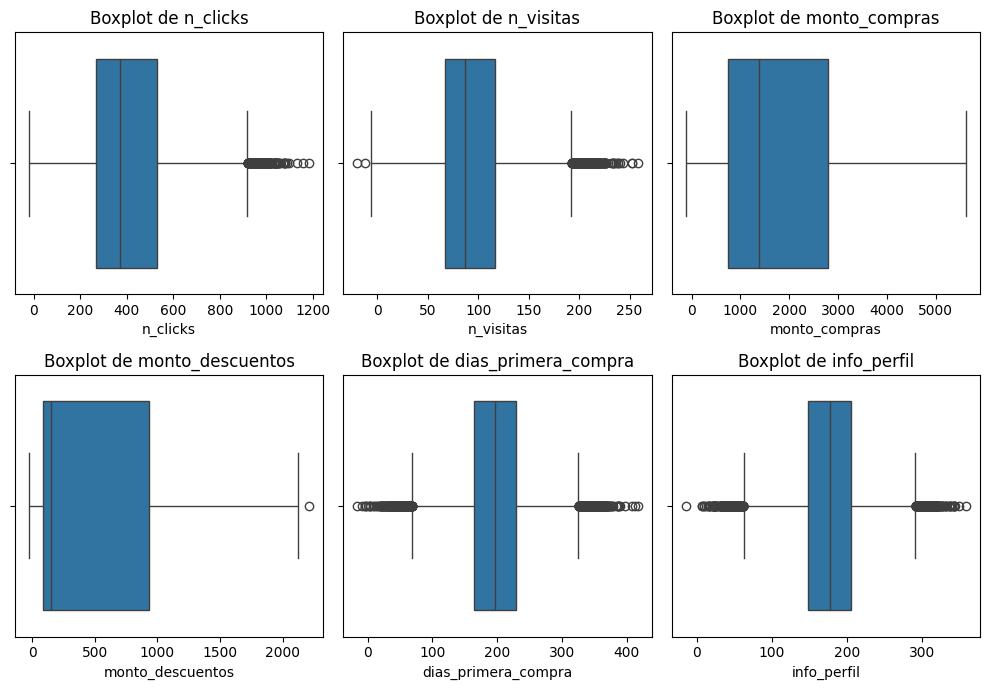

In [14]:
#Revisión y ecploración de parte gráfica de los datos
import seaborn as sns
import matplotlib.pyplot as plt

#Extraer columnas numéricas
num_cols = df.select_dtypes(include=["number"]).columns
#Crear figura vacía
plt.figure(figsize=(10, 7))
#Iterar sobre cada columna numérica y crear boxplot
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot de {col}')
plt.tight_layout()

In [15]:
df[df[num_cols]<0].count()

ID                     0
n_clicks               2
n_visitas              4
monto_compras          1
monto_descuentos       2
dias_primera_compra    5
info_perfil            1
dtype: int64

In [19]:
#Limpieza del dataset
df_clean = df.dropna()
print(f"Tamaño dataset antes de la eliminación de datos faltantes: {df.shape}")
print(f"Tamaño dataset después de la eliminación de datos faltantes: {df_clean.shape}")


Tamaño dataset antes de la eliminación de datos faltantes: (55056, 7)
Tamaño dataset después de la eliminación de datos faltantes: (55021, 7)


In [20]:
#Eliminación de columna que no contiene mayor información
df_clean.drop(columns=['ID'], inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_1140\2574980349.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop(columns=['ID'], inplace=True)


In [21]:
print(f'Tamaño dataset antes de la eliminación de valores extremos: {df_clean.shape}')
df_clean = df_clean[df_clean[num_cols].ge(0).all(axis=1)]
print(f'Tamaño dataset después de la eliminación de valores extremos: {df_clean.shape}')

Tamaño dataset antes de la eliminación de valores extremos: (55021, 6)
Tamaño dataset después de la eliminación de valores extremos: (55006, 6)


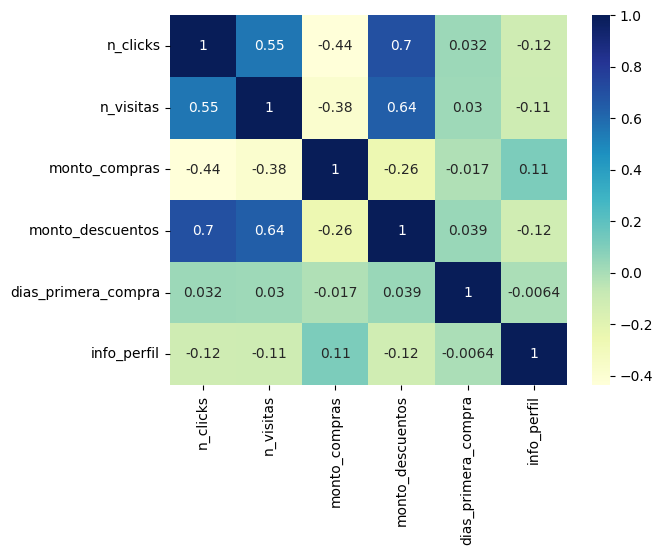

In [22]:
corr = df_clean.corr()
ax = sns.heatmap(corr, cmap="YlGnBu", annot=True)

In [24]:
#Se guarda un nuevo dataset limpio
df_clean.to_csv("../data/dataset_ecommerceclean.csv")